In [13]:
import scanpy as sc
import pandas as pd

/mnt/disk1/xiaojk/anaconda/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(
/mnt/disk1/xiaojk/anaconda/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/mnt/disk1/xiaojk/anaconda/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/mnt/disk1/xiaojk/anaconda/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found:

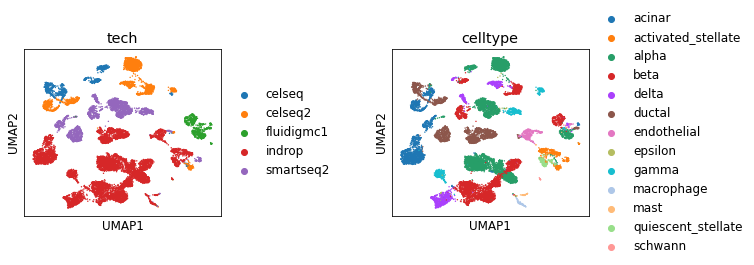

In [25]:
adata = sc.read_h5ad('/mnt/disk1/xzhou/data/bigmodel/scGPT/panc8.h5ad')
# adata = data.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=5000)
adata = adata[:,adata.var['highly_variable']]
sc.pp.scale(adata, max_value=10)
sc.pp.pca(adata)
sc.pp.neighbors(adata, use_rep='X_pca',random_state=666)
sc.tl.umap(adata, random_state=666)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["figure.figsize"] = (3,3)
plt.rcParams['font.size'] = 12
# adata.obsr'batch'] = MS'
# odtaoos'batch'Idataobs/"mple Choratteristiclindividuol1' isin/ 'g''5' "6''7'.'' "c'3','2' '4')1 : 'control
sc.pl.umap(adata, color=['tech','celltype'], ncols=2, wspace=0.7, show=True)